У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('../data/yulu_rental.csv')

1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

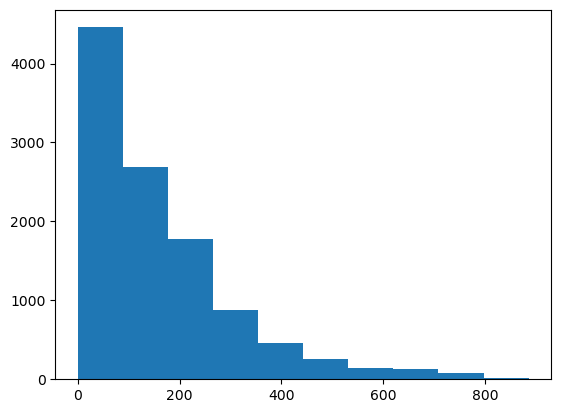

In [2]:
plt.hist(df.registered);

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

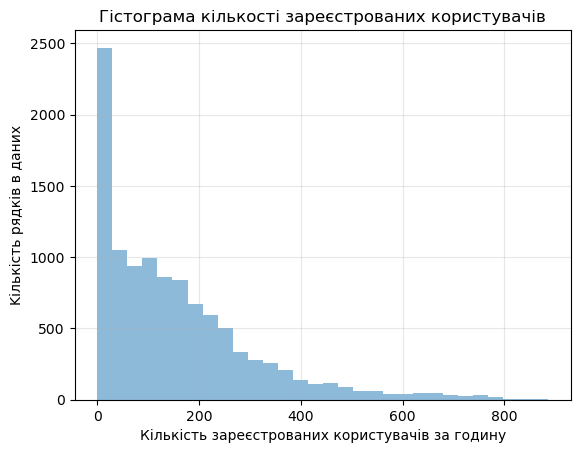

In [3]:
plt.hist(df.registered, bins=30, alpha=.5)
plt.grid(axis='both', alpha=.3)
plt.title('Гістограма кількості зареєстрованих користувачів')
plt.xlabel('Кількість зареєстрованих користувачів за годину')
plt.ylabel('Kількість рядків в даних');

In [4]:
import numpy as np
np.histogram(df.registered, bins = 30)

(array([2470, 1053,  936,  991,  863,  840,  674,  598,  503,  334,  282,
         257,  211,  137,  113,  114,   88,   60,   61,   42,   39,   45,
          50,   31,   29,   33,   19,    8,    2,    3], dtype=int64),
 array([  0.        ,  29.53333333,  59.06666667,  88.6       ,
        118.13333333, 147.66666667, 177.2       , 206.73333333,
        236.26666667, 265.8       , 295.33333333, 324.86666667,
        354.4       , 383.93333333, 413.46666667, 443.        ,
        472.53333333, 502.06666667, 531.6       , 561.13333333,
        590.66666667, 620.2       , 649.73333333, 679.26666667,
        708.8       , 738.33333333, 767.86666667, 797.4       ,
        826.93333333, 856.46666667, 886.        ]))

Ця гістограми допомагає нам оцінити, де зосереджені значення, які крайні значення, бачимо, що прогалин немає. Бачимо, що найбільша кількість користувачів від 0 до 29 за годинну в дата фреймі. Суттєво менше рядочків в даних, коли ми проходимо межу 200 користувачів за год.

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [5]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [6]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [7]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

In [8]:
no_registered = df[df.registered==0].groupby('dayofweek')['registered'].count()
no_registered

dayofweek
0    5
1    3
2    2
3    1
4    1
5    1
6    2
Name: registered, dtype: int64

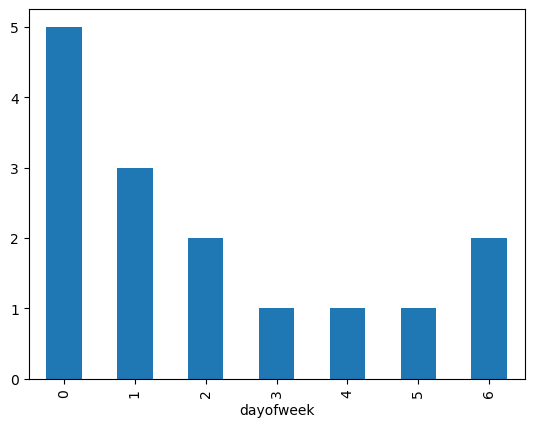

In [9]:
no_registered.plot.bar();

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

In [10]:
by_weather = df.groupby('weather')['registered'].sum()
by_weather

weather
1    1186163
2     419914
3      87106
4        158
Name: registered, dtype: int64

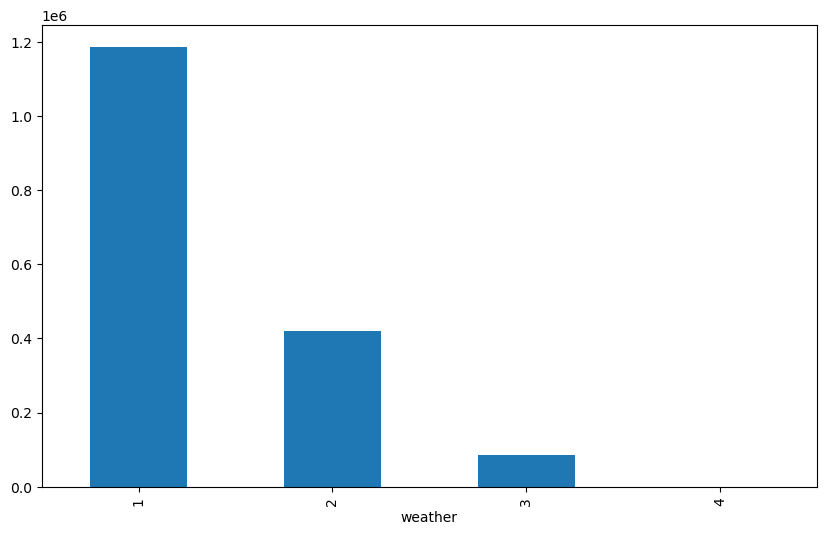

In [11]:
by_weather.plot.bar(figsize = (10,6));

Для мене побудована візуалізація не має логічний сенс з точки зору опису даних, бо вона незрозуміло передає дані. Я би обрала інший тип діаграми, який дасть нам змогу відобразити всі дані і буде більш ясніший або, наприклад, використати графік типу bar, але щоб по осі Х була відображена кількість користувачів зі значеннями.

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

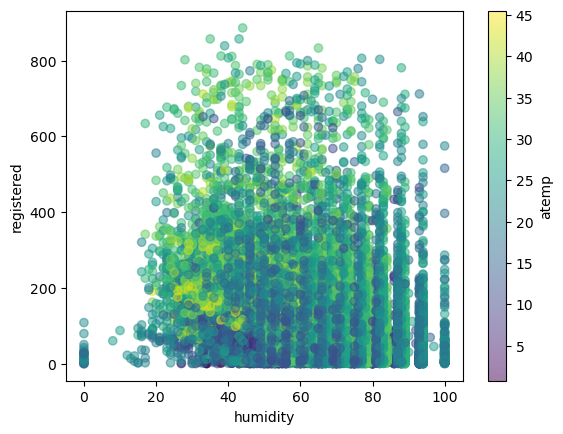

In [12]:
col_x = 'humidity'
col_y = 'registered'

plt.scatter(df[col_x], df[col_y], alpha=0.5, c = df.atemp)
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.colorbar(label = 'atemp');

На діаграмі я не бачу ані позитивної, ані негативної кореляції. Точки розсіялися равномірно, особливо, які зосередилися в діапазоні вологості (30-80).
Колір точок за відчуваною температурою варіюється від блакитного до жовтого.
Спостерігаємо, що при максимальній вологості значно менше зареєстрованих користувачів. Робимо висновок - що макс вологість впливає негативно на використання велосипеду.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)